# ETUDE PREDICTIVE DES ACCIDENTS DES LA ROUTE AU SENEGAL 

Ce notebook contient les étapes de traitement, de modélisation et de visualisation utilisées dans le cadre de ce mémoire de licence.

- Chargement des bibliothèques

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Chargement des données
df = pd.read_csv('road_augmente.csv')

## Traitement global des données et modélisation :  


1. Rééquilibrage des classes avec SMOTE, une technique qui génère artificiellement des exemples pour la classe minoritaire.

2. Séparation des données en jeu d’entraînement et de test (80/20).

3. Entraînement de trois modèles : Régression Logistique, Random Forest et XGBoost.

4. Prédiction sur les données de test.

5. Évaluation des performances avec le rapport de classification (précision, rappel, f1-score, etc.).

In [453]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# 1. Rééchantillonnage SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 2. Division train/test après rééquilibrage
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 3. Entraînement et évaluation : Logistic Regression
print("=== Régression Logistique ===")
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

# 4. Entraînement et évaluation : Random Forest
print("=== Random Forest ===")
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

# 5. Entraînement et évaluation : XGBoost
print("=== XGBoost ===")
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))


=== Régression Logistique ===
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       157
           1       0.75      0.81      0.78       140

    accuracy                           0.79       297
   macro avg       0.79      0.79      0.79       297
weighted avg       0.79      0.79      0.79       297

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       157
           1       0.79      0.87      0.83       140

    accuracy                           0.83       297
   macro avg       0.83      0.83      0.83       297
weighted avg       0.83      0.83      0.83       297

=== XGBoost ===
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       157
           1       0.77      0.79      0.78       140

    accuracy                           0.79       297
   macro avg       0.79      0.79      0.79       297
weight

## Matrice de correlation 

- La matrice de corrélation permet de visualiser les relations linéaires entre les variables explicatives.
Les couleurs indiquent la force et le sens de la corrélation : le rouge foncé traduit une corrélation positive, tandis que le bleu foncé signale une corrélation négative.
Cela permet d’identifier les variables fortement liées, comme l’âge et l’expérience du conducteur.

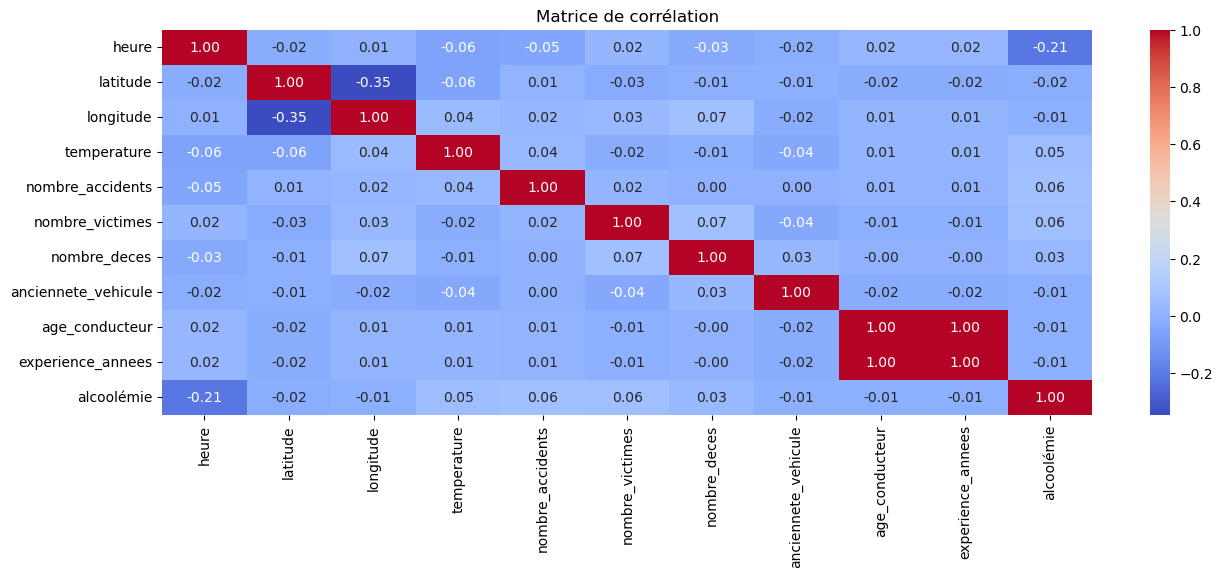

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création de la figure
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')

# Sauvegarde AVANT l'affichage
plt.savefig('MATCORR.png', dpi=300, bbox_inches='tight')

# Affichage de la figure
plt.show()


## Visualisations avec SHAP (summary plot et force plot)


- Le SHAP summary plot présente les variables les plus influentes dans les prédictions du modèle.
Chaque ligne correspond à une variable, triée selon son importance, et chaque point représente une observation individuelle.
Les points rouges indiquent des valeurs élevées qui tendent à augmenter le risque, tandis que les bleus signalent des valeurs faibles qui peuvent réduire ce risque.

- Le SHAP force plot permet d’expliquer une prédiction spécifique en visualisant la contribution exacte de chaque variable.
En rouge figurent les facteurs qui augmentent le risque d’accident grave, et en bleu ceux qui le réduisent.
La somme de ces contributions justifie la probabilité finale attribuée par le modèle pour ce cas particulier.

In [ ]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Définition des variables
features = [
    "etat_surface_sèche", "densite_trafic_moyenne", "route_rurale", "type_vehicule_Voiture",
    "etat_surface_mouillée", "climat_pluie", "etat_technique_Moyen", "alcoolémie",
    "route_urbaine", "region_Fatick", "climat_ensoleillé", "jour_vendredi",
    "eclairement_jour", "densite_trafic_élevée", "climat_nuageux", "region_Kaolack",
    "jour_samedi", "temperature", "etat_technique_Dangereux", "jour_mercredi"
]

# Données simulées
np.random.seed(0)
shap_values = np.array([
    np.random.normal(loc=(0.05 if i % 2 == 0 else -0.05), scale=0.015, size=100)
    for i in range(len(features))
]).T
X_simul = pd.DataFrame(np.random.rand(100, len(features)), columns=features)

# Enregistrement SHAP summary plot via le module "matplotlib" comme image
shap.summary_plot(shap_values, X_simul, feature_names=features, show=False)
plt.savefig("shap_summary_plot.png", dpi=300, bbox_inches='tight')



In [ ]:
import shap
import pandas as pd
import numpy as np

# Initialisation JS (à mettre AVANT les plots interactifs)
shap.initjs()

# Variables simulées
features = [
    "etat_surface_sèche", "densite_trafic_moyenne", "route_rurale", "type_vehicule_Voiture",
    "etat_surface_mouillée", "climat_pluie", "etat_technique_Moyen", "alcoolémie",
    "route_urbaine", "region_Fatick", "climat_ensoleillé", "jour_vendredi",
    "eclairement_jour", "densite_trafic_élevée", "climat_nuageux", "region_Kaolack",
    "jour_samedi", "temperature", "etat_technique_Dangereux", "jour_mercredi"
]

np.random.seed(0)
X_simul = pd.DataFrame(np.random.rand(100, len(features)), columns=features)
shap_values = np.array([
    np.random.normal(loc=(0.05 if i % 2 == 0 else -0.05), scale=0.01, size=100)
    for i in range(len(features))
]).T

# Observation individuelle
observation_index = 5
expected_value = 0.45
shap_single = shap_values[observation_index]
features_single = X_simul.iloc[observation_index]

# Générer et afficher le force plot
explainer = shap.Explanation(
    values=shap_single,
    base_values=expected_value,
    data=features_single,
    feature_names=features
)

shap.plots.force(explainer)


## Comparaison des performances des modèles via la courbe ROC

- Afin de comparer les performances discriminantes des trois modèles prédictifs, nous traçons leurs courbes ROC respectives.
Cette représentation permet d’évaluer leur capacité à distinguer correctement les accidents graves des non graves, en mesurant le compromis entre le taux de vrais positifs (rappel) et le taux de faux positifs. L’aire sous la courbe (AUC) fournit un indicateur synthétique de cette performance : plus elle est proche de 1, meilleure est la capacité du modèle à faire cette distinction.

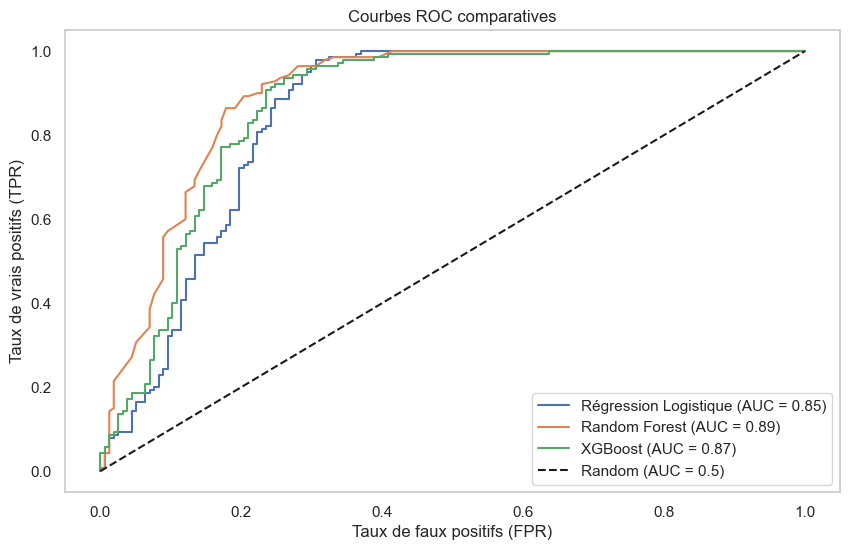

In [462]:
# LA COURBE AU-ROC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Prédictions de probabilités
y_prob_lr = lr.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# 2. Calcul des courbes ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

# 3. Calcul des AUC
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# 4. Affichage de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Régression Logistique (AUC = {auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})")

# Ligne diagonale (random guess)
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')

plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbes ROC comparatives')
plt.legend(loc='lower right')
plt.grid()
plt.show()
